# Анализ причин неэффективности рекламной кампании приложения Procrastinate Pro+

## Общая информация о проекте

**Описание проекта:**   
несмотря на большие вложения в рекламу развлекательного приложения Procrastinate Pro+, компания терпит убытки. Необходимо выяснить причины неокупаемости рекламы.

**Задачи:**
1. провести предобработку данных;
2. провести исследовательский анализ данных;
3. проанализировать затраты на маркетинг;
4. оценить окупаемость рекламы путем рассчета LTV и ROI;
5. оценить конверсию и удержание пользователей;
6. сделать выводы и подготовить рекомендации для отдела маркетинга.

**Предоставленные данные:**
доступны лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов.


<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-проекте" data-toc-modified-id="Общая-информация-о-проекте-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о проекте</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных-к-анализу" data-toc-modified-id="Загрузка-и-подготовка-данных-к-анализу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных к анализу</a></span><ul class="toc-item"><li><span><a href="#Датафрейм-visits" data-toc-modified-id="Датафрейм-visits-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Датафрейм <code>visits</code></a></span></li><li><span><a href="#Датафрейм-orders" data-toc-modified-id="Датафрейм-orders-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Датафрейм <code>orders</code></a></span></li><li><span><a href="#Датафрейм-costs" data-toc-modified-id="Датафрейм-costs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Датафрейм <code>costs</code></a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Создание-функций-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Создание-функций-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Создание функций для расчета и анализа LTV, ROI, удержания и конверсии</a></span><ul class="toc-item"><li><span><a href="#Функция-для-создания-пользовательских-профилей" data-toc-modified-id="Функция-для-создания-пользовательских-профилей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для создания пользовательских профилей</a></span></li><li><span><a href="#Функция-для-расчета-коэффициента-удержания" data-toc-modified-id="Функция-для-расчета-коэффициента-удержания-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция для расчета коэффициента удержания</a></span></li><li><span><a href="#Функция-для-расчета-коэффициента-конверсии" data-toc-modified-id="Функция-для-расчета-коэффициента-конверсии-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Функция для расчета коэффициента конверсии</a></span></li><li><span><a href="#Функция-для-расчета-LTV-и-ROI" data-toc-modified-id="Функция-для-расчета-LTV-и-ROI-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Функция для расчета LTV и ROI</a></span></li><li><span><a href="#Функция-для-сглаживания-графиков" data-toc-modified-id="Функция-для-сглаживания-графиков-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Функция для сглаживания графиков</a></span></li><li><span><a href="#Функция-для-визуализации-удержания" data-toc-modified-id="Функция-для-визуализации-удержания-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Функция для визуализации удержания</a></span></li><li><span><a href="#Функция-для-визуализации-конверсии" data-toc-modified-id="Функция-для-визуализации-конверсии-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Функция для визуализации конверсии</a></span></li><li><span><a href="#Функция-для-визуализации-LTV-и-ROI" data-toc-modified-id="Функция-для-визуализации-LTV-и-ROI-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Функция для визуализации LTV и ROI</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Создание-пользовательских-профилей" data-toc-modified-id="Создание-пользовательских-профилей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создание пользовательских профилей</a></span></li><li><span><a href="#Определение-минимальной-и-максимальной-даты-привлечения-пользователей" data-toc-modified-id="Определение-минимальной-и-максимальной-даты-привлечения-пользователей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Определение минимальной и максимальной даты привлечения пользователей</a></span></li><li><span><a href="#Определение-географии-пользователей-и-доли-платящих-пользователей-в-разных-странах" data-toc-modified-id="Определение-географии-пользователей-и-доли-платящих-пользователей-в-разных-странах-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Определение географии пользователей и доли платящих пользователей в разных странах</a></span></li><li><span><a href="#Определение-устройств-пользователей-и-доли-платящих-среди-пользователей-разных-устройств" data-toc-modified-id="Определение-устройств-пользователей-и-доли-платящих-среди-пользователей-разных-устройств-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Определение устройств пользователей и доли платящих среди пользователей разных устройств</a></span></li><li><span><a href="#Определение-источников-привлечения-и-доли-платящих-для-каждого-рекламного-источника" data-toc-modified-id="Определение-источников-привлечения-и-доли-платящих-для-каждого-рекламного-источника-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Определение источников привлечения и доли платящих для каждого рекламного источника</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Определение-общей-суммы-расходов-на-маркетинг-за-исследуемый-период" data-toc-modified-id="Определение-общей-суммы-расходов-на-маркетинг-за-исследуемый-период-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Определение общей суммы расходов на маркетинг за исследуемый период</a></span></li><li><span><a href="#Определение-суммы-расходов-и-динамики-расходов-на-маркетинг-для-каждого-источника" data-toc-modified-id="Определение-суммы-расходов-и-динамики-расходов-на-маркетинг-для-каждого-источника-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Определение суммы расходов и динамики расходов на маркетинг для каждого источника</a></span></li><li><span><a href="#Расчет-средней-стоимости-привлечения-одного-пользователя-для-всего-проекта" data-toc-modified-id="Расчет-средней-стоимости-привлечения-одного-пользователя-для-всего-проекта-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Расчет средней стоимости привлечения одного пользователя для всего проекта</a></span></li><li><span><a href="#Расчет-средней-стоимости-привлечения-одного-пользователя-для-каждого-источника-трафика" data-toc-modified-id="Расчет-средней-стоимости-привлечения-одного-пользователя-для-каждого-источника-трафика-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Расчет средней стоимости привлечения одного пользователя для каждого источника трафика</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Окупаемость-рекламы-для-привлечения-пользователей" data-toc-modified-id="Окупаемость-рекламы-для-привлечения-пользователей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Окупаемость рекламы для привлечения пользователей</a></span><ul class="toc-item"><li><span><a href="#Анализ-общей-окупаемости-рекламы" data-toc-modified-id="Анализ-общей-окупаемости-рекламы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Анализ общей окупаемости рекламы</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-странам-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по странам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li><li><span><a href="#Анализ-конверсии-и-удержания-с-разбивкой-по-устройствам" data-toc-modified-id="Анализ-конверсии-и-удержания-с-разбивкой-по-устройствам-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Анализ конверсии и удержания с разбивкой по устройствам</a></span></li><li><span><a href="#Анализ-конверсии-и-удержания-с-разбивкой-по-странам" data-toc-modified-id="Анализ-конверсии-и-удержания-с-разбивкой-по-странам-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Анализ конверсии и удержания с разбивкой по странам</a></span></li><li><span><a href="#Анализ-конверсии-и-удержания-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Анализ-конверсии-и-удержания-с-разбивкой-по-рекламным-каналам-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Анализ конверсии и удержания с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-6.9"><span class="toc-item-num">6.9&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка и подготовка данных к анализу 

Для начала загрузим данные из файлов и сохраним их в соответсвующие переменные:  
`visits` содержит лог сервера с информацией о посещениях приложения;  
`orders` содержит информацию о заказах;  
`costs` содержит информацию о затратах на маркетинг.

In [1]:
# импорт необходимых библиотек
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
# чтение файлов
visits = pd.read_csv('~/Documents/datasets/visits_info_short.csv')
orders = pd.read_csv('~/Documents/datasets/orders_info_short.csv')
costs = pd.read_csv('~/Documents/datasets/costs_info_short.csv')

### Датафрейм `visits`

Взглянем на датафрейм `visits` и получим общую информацию о нем.

In [3]:
visits.info()
visits.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

В датафрейме 309901 строка. Пропусков в данных нет. Убедимся, что в датафрейме нет полных дубликатов.

In [4]:
# подсчет числа полных дубликатов
visits.duplicated().sum()

0

Переименуем столбцы датафрейма `visits` таким образом, чтобы их названия содержали только строчные буквы и не содержали пробелов. Также приведем столбцы с датами в формат `datetime`.

In [5]:
# переименование столбцов
visits = visits.rename(columns={'User Id': 'user_id', 'Session Start': 'session_start', 'Session End': 'session_end'})
visits.columns = visits.columns.str.lower()

# преобразование формата столбцов с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Убедимся в том, что преобразования прошли успешно.

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


**Описание данных:**  
`user_id` — уникальный идентификатор пользователя  
`region` — страна пользователя  
`device` — категория устройства пользователя  
`channel` — идентификатор рекламного источника, из которого пришел пользователь  
`session_start` — дата и время начала сессии  
`session_end` — дата и время окончания сессии  

### Датафрейм `orders`

Взглянем на датафрейм `orders` и получим общую информацию о нем.

In [7]:
orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

В датафрейме 40212 строк. Пропусков в данных нет. Убедимся, что в датафрейме нет полных дубликатов.

In [8]:
# подсчет числа полных дубликатов
orders.duplicated().sum()

0

Переименуем столбцы датафрейма `orders` таким образом, чтобы их названия содержали только строчные буквы и не содержали пробелов. Также приведем столбец с датой в формат `datetime`.

In [9]:
# переименование столбцов
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'})
# преобразование формата столбца с датой
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Убедимся в том, что преобразования прошли успешно.

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


**Описание данных:**  
`user_id` — уникальный id пользователя, который сделал заказ  
`event_dt` — дата и время покупки  
`revenue` — выручка

### Датафрейм `costs`

Взглянем на датафрейм `costs` и получим общую информацию о нем.

In [11]:
costs.info()
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

В датафрейме 1900 строк. Пропусков в данных нет. Убедимся, что в датафрейме нет полных дубликатов.

In [12]:
# подсчет числа полных дубликатов
costs.duplicated().sum()

0

Переименуем столбцы датафрейма orders таким образом, чтобы их названия содержали только строчные буквы. Также приведем столбец с датой в формат datetime.

In [13]:
# переименование столбцов
costs.columns = costs.columns.str.lower()
# преобразование формата столбца с датой
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Убедимся в том, что преобразования прошли успешно.

In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Описание данных:**  
`dt` — дата  
`channel` — идентификатор рекламного источника  
`costs` — затраты на этот рекламный источник в этот день

### Выводы
1. В представленных данных не было пропусков и явных дубликатов.
2. Формат данных в столбцах с датой был преобразован в `datetime`.
3. Названия столбцов были приведены к корректной форме.

## Создание функций для расчета и анализа LTV, ROI, удержания и конверсии

### Функция для создания пользовательских профилей 

Напишем функцию, принимающую в качестве аргумента датафреймы с информацией о посещениях приложения, совершенных покупкаах и затратах на рекламу, и возвращающую датафрейм с пользовательскими профилями. В профилях будет содержаться информация о дате и времени первого посещения приложения, а также о стране пользователя, устройстве пользователя и источником перехода на сайт на момент первого посещения. Дополнительно определим дату первого посещения и первый день месяца, в который это посещение произошло. Добавим также в профили столбец `'payer'`, принимающий значение `True`, если пользователь совершал покупку, и `False`, если пользователь не совершал покупку, и `'acquisition_cost'`, содержащий информацию о стоимости привлечения пользователя.

In [15]:
def get_profiles(sessions, orders, ad_costs):
    
    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index() # возвращаем user_id из индекса
    )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # проверяем, есть ли ID пользователей из profiles в orders
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчета коэффициента удержания

Напишем функцию для рассчета коэффициента удержания. Функция принимает в качестве аргументов датафреймы с профилями пользователей и логами с информацией о посещениях приложения, признак, по которому производится группировка данных, а также момент анализа, горизонт анализа и параметр, регулирующий игнорирование горизонта (`True` или `False`). Функция возвращает три таблицы: "сырые" данные о коэффициенте удержания, данные о коэффициенте удержания после группировки по необходимому признаку и данные о динамике коэффициента удержания.

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета коэффициента конверсии

Напишем функцию для рассчета коэффициента конверсии. Функция принимает в качестве аргументов датафреймы с профилями пользователей и данными о совершенных заказах, признак, по которому производится группировка данных, а также момент анализа, горизонт анализа и параметр, регулирующий игнорирование горизонта (`True` или `False`). Функция возвращает три таблицы: "сырые" данные о коэффициенте конверсии, данные о коэффициенте конверсии после группировки по необходимому признаку и данные о динамике коэффициента конверсии.

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета LTV и ROI

Напишем функцию для рассчета коэффициента "пожизненной ценности" клиента и окупаемости инвестиций. Функция принимает в качестве аргументов датафреймы с профилями пользователей и данными о совершенных заказах, признак, по которому производится группировка данных, а также момент анализа, горизонт анализа и параметр, регулирующий игнорирование горизонта (`True` или `False`). Функция возвращает пять таблиц: "сырые" данные, данные о LTV после группировки по необходимому признаку, данные о динамике LTV, данные о ROI после группировки по необходимому признаку и данные о динамике ROI.

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания графиков

Напишем функцию для сглаживания графиков. Функция принимает в качестве аргументов датафрейм и параметр ширина "окна" для подсчета скользящего среднего. Функция возвращает датафрейм, в котором для каждого столбца подсчитано скользящее среднее.

In [19]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания

Напишем функцию для построения графиков удержания. Функция принимает в качестве аргументов таблицу с коэффициентами удержания (сгруппированную по какому-либо признаку или нет), горизонт анализа (n-ный день), таблицу с данными о динамике коэффициента удержания на n-ный день, а также ширину "окна" для сглаживания графика. Функция возвращает 4 графика: удержание и динамика удержания для платящих пользователей, и аналогичные два графика для неплатящих пользователей.

In [20]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

Напишем функцию для построения графиков конверсии. Функция принимает в качестве аргументов таблицу с коэффициентами конверсии (сгруппированную по какому-либо признаку или нет), горизонт анализа (n-ный день), таблицу с данными о динамике коэффициента конверсии на n-ный день, а также ширину "окна" для сглаживания графика. Функция возвращает 2 графика: конверсия и динамика конверсии.

In [21]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

Напишем функцию для построения графиков "пожизненной ценности" клиента и окупаемости инвестиций. Функция принимает в качестве аргументов горизонт анализа (n-ный день), таблицу с LTV (с группировкой или без), таблицу с данными о динамике LTV на n-ный день, таблицу с ROI (с группировкой или без), таблицу с динамикой ROI на n-ный день, а также ширину "окна" для сглаживания графика. Функция возвращает 5 графиков: LTV, динамика LTV, динамика CAC, ROI и динамика ROI.

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Создание пользовательских профилей

С помощью функции `get_profiles` создадим пользовательские профили:

In [23]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
5  2019-05-09 2019-05-01  False          0.000000  
6  2019-08-16 2019-08-01  False          0.000000  
7  2019-06-30 2019-06-01   True          1.008000  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

Определим количество строк в датафрейме.

In [24]:
len(profiles)

150008

### Определение минимальной и максимальной даты привлечения пользователей

Определим минимальную и максимальную даты привлечения пользователей.

In [25]:
print('Минимальная дата привлечения пользователей:', profiles['first_ts'].min())
print('Максимальная дата привлечения пользователей:', profiles['first_ts'].max())

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


### Определение географии пользователей и доли платящих пользователей в разных странах

Определим функцию, группирующую пользователей по задаваемому признаку и подсчитывающую долю платящих пользователей в каждой группе.

In [26]:
def payers_fraction(dimension):
    fraction_table = profiles.pivot_table(
        index=dimension, 
        values='payer', 
        aggfunc=['count', 'mean']
    )
    fraction_table.columns=['users_number', 'payers_fraction']
    fraction_table = fraction_table.sort_values(
        by='payers_fraction', 
        ascending=False
    )
    return fraction_table

С помощью функции `payers_fraction` изучим географию пользователей, сгруппировав датафрейм с профилями по странам, и рассчитаем долю платящих пользователей в каждой стране.

In [27]:
payers_fraction('region')

users_number  payers_fraction
region                                      
United States        100002         0.069019
Germany               14981         0.041119
UK                    17575         0.039829
France                17450         0.037994

### Определение устройств пользователей и доли платящих среди пользователей разных устройств

Аналогично получим информацию об устройствах пользователей и доле платящих среди пользователей различных утсройств.

In [28]:
payers_fraction('device')

users_number  payers_fraction
device                                
Mac             30042         0.063644
iPhone          54479         0.062079
Android         35032         0.058518
PC              30455         0.050468

### Определение источников привлечения и доли платящих для каждого рекламного источника

Определеим рекламные источники привлечения пользователей и долю платящих для каждого канала привлечения.

In [29]:
payers_fraction('channel')

users_number  payers_fraction
channel                                          
FaceBoom                   29144         0.122049
AdNonSense                  3880         0.113402
lambdaMediaAds              2149         0.104700
TipTop                     19561         0.096007
RocketSuperAds              4448         0.079137
WahooNetBanner              8553         0.052964
YRabbit                     4312         0.038265
MediaTornado                4364         0.035747
LeapBob                     8553         0.030633
OppleCreativeMedia          8605         0.027077
organic                    56439         0.020553

### Выводы

1. В нашем распоряжении информация о 150008 уникальных пользователях, привлеченных в период с 2019-05-01 по 2019-10-27.
2. Привлеченные пользователи находились в США, Германии, Великобритании и Франции. Пользователей из США на порядок больше, чем из других стран. Наибольшая доля платящих приходится на клиентов из США. 
3. Для работы с приложением клиенты использовали устройства Mac, iPhone, Android и PC. Пользователи Mac и iPhone платили в приложении несколько чаще, чем пользователи Android и PC. 
4. Наибольшая доля платящих приходится на пользователей, привлеченных FaceBoom, AdNonSense и lambdaMediaAds – более 10% пользователей, пришедших из этих каналов, совершали покупки.

## Маркетинг

### Определение общей суммы расходов на маркетинг за исследуемый период

Рассчитаем сумму затрат на маркетинг за весь исследуемый период.

In [30]:
costs['costs'].sum()

105497.30000000002

### Определение суммы расходов и динамики расходов на маркетинг для каждого источника

Рассмотрим, каким образом траты распределены по рекламным источникам.

In [31]:
channel_cost_sum = costs.pivot_table(
    index='channel', 
    values='costs', 
    aggfunc='sum'
)

channel_cost_sum['proportion'] = channel_cost_sum['costs'] / channel_cost_sum['costs'].sum()
channel_cost_sum.sort_values(by='proportion', ascending=False)

costs  proportion
channel                                 
TipTop              54751.30    0.518983
FaceBoom            32445.60    0.307549
WahooNetBanner       5151.00    0.048826
AdNonSense           3911.25    0.037074
OppleCreativeMedia   2151.25    0.020392
RocketSuperAds       1833.00    0.017375
LeapBob              1797.60    0.017039
lambdaMediaAds       1557.60    0.014764
MediaTornado          954.48    0.009047
YRabbit               944.22    0.008950

Теперь построим график, отражающий изменения затрат на рекламу во времени в разбивке по источникам. Сгладим график при помощи скользящего среднего затрат за 7 дней.

In [32]:
# создаем сводную таблицу, в которой каждому столбцу соответствует источник, а каждой строке — дата;
# в каждой ячейке таблицы содержится информация о тратах на рекламу в конкретный день для конкретного источника
costs_timeline = costs.pivot_table(
    index='dt', 
    columns='channel', 
    values='costs', 
    aggfunc='sum'
)

# для каждого источника считаем скользящее среднее за 7 дней
filtered_costs_timeline = filter_data(costs_timeline, 7)

# строим график
fig = px.line(filtered_costs_timeline)
fig.update_layout(
    title=dict(
        text='Динамика затрат на маркетинг (скользящее среднее за 7 дней) в разбивке по источникам', 
        font_size=18
    ),
    xaxis=dict(
        title='Дата привлечения', 
        title_font_size=11, 
        range=('2019-05-07', '2019-10-27')
    ),
    yaxis=dict(
        title='Затраты, у.е.', 
        title_font_size=11
    ),
    width=950, height=500,
    legend_title_text='Источник'
)
fig.show()

### Расчет средней стоимости привлечения одного пользователя для всего проекта

Получим среднее и медиану стоимости привлечения пользователей. Предварительно исключим из датафрейма с профилями "органических пользователей", чтобы они не занижали общую стоимость привлечения одного пользователя.

In [33]:
profiles.query('channel != "organic"').agg({'acquisition_cost': ['mean', 'median']})

acquisition_cost
mean            1.127481
median          1.080531

### Расчет средней стоимости привлечения одного пользователя для каждого источника трафика

Рассчитаем среднюю и медиану стоимости привлечения одного пользователя в зависимости от источника трафика.

In [34]:
profiles.pivot_table(
    index='channel', 
    values='acquisition_cost', 
    aggfunc=['mean', 'median']
).sort_values(by=('mean', 'acquisition_cost'), ascending=False)

mean           median
                   acquisition_cost acquisition_cost
channel                                             
TipTop                     2.799003         3.000000
FaceBoom                   1.113286         1.114667
AdNonSense                 1.008054         1.004348
lambdaMediaAds             0.724802         0.733333
WahooNetBanner             0.602245         0.600000
RocketSuperAds             0.412095         0.404444
OppleCreativeMedia         0.250000         0.250000
YRabbit                    0.218975         0.214286
MediaTornado               0.218717         0.220926
LeapBob                    0.210172         0.210000
organic                    0.000000         0.000000

### Выводы

1. Общая сумма затрат на маркетинг составила 105 497.3 у.е.
2. Наиболее затратные источники привлечения пользователей — TipTop и FaceBoom. На их долю приходится более 80% затрат.
3. Расходы на привлечение пользователей из источников TipTop и FaceBoom демонстрировали тенденцию к постепенному росту в исследованном периоде. При этом рост этот не был равномерным: траты на оба источника росли, достигая пика к началу месяца, а затем снижались. Исключением в этом отношении являлся лишь август — затраты на маркетинг для источников TipTop и FaceBoom оставались в этом месяце приблизительно постоянными.
4. Затраты на остальные рекламные источники оставались в исследованном периоде относительно постоянными. Лишь расходы после июня 2019 на AdNonSense несколько снизились, а на  WahooNetBanner, напротив, несколько возросли. 
5. Средняя стоимость привлечения одного пользователя для всего проекта (без учета органических пользователей) составила 1.1 у.е. 
6. Средняя стоимость привлечения одного пользователя из TipTop составила 2.8 у.е. — это максимальное значение среди всех источников. На втором месте по стоимости привлечения одного клиента располагается FaceBoom (1.1 у.е.), на третьем — AdNonSense (1.0 у.е.)

## Окупаемость рекламы для привлечения пользователей

Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, и зададим горизонт анализа в две недели.

In [35]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Для анализа окупаемости рекламы нам понадобится информация только о платных пользователях. Наличие "органических" пользоваталей в массиве данных будет завышать окупаемость. Исключим их:

In [36]:
profiles = profiles.query('channel != "organic"')

### Анализ общей окупаемости рекламы

Построим графики, отражающие LTV и ROI. Для этого последовательно вызовем функции `get_ltv` (для расчета) и `plot_ltv_roi` (для визуализации).

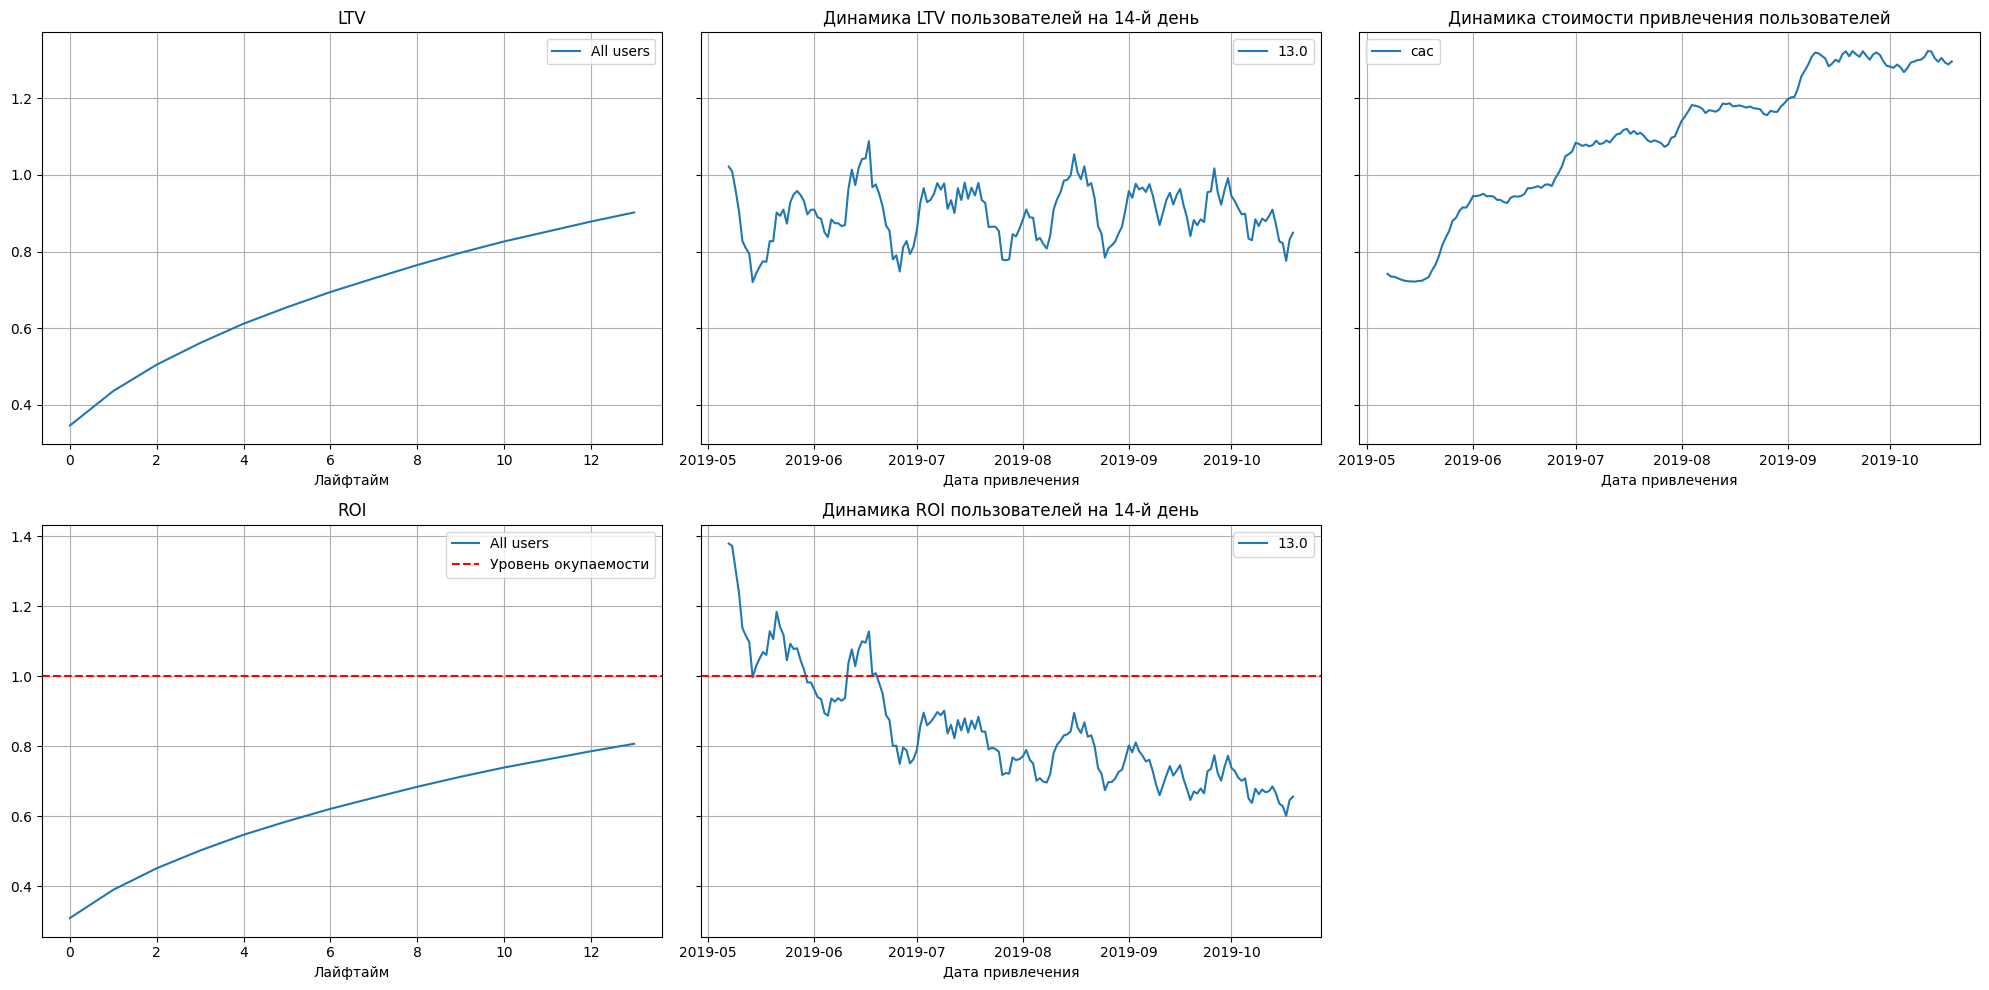

In [37]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

**Выводы**
1. LTV 14-го дня составляет чуть около 0.9 у.е.
2. Показатель LTV хоть и варьирует в некоторых пределах с течением времени, тем не менее достаточно стабилен в рамках всего периода анализа.
2. Стоимость привлечения пользователей начала расти в середине мая и продолжила расти вплоть до сентября.
3. Реклама не окупается: к концу второй недели ROI так и не достигает значения 1.
4. С момента начала анализа ROI снижался, и в начале июня впервые опустился ниже уровня окупаемости. 

### Анализ окупаемости рекламы с разбивкой по устройствам

Построим графики, отражающие LTV и ROI  зависимости от устройства пользователей. Для этого последовательно вызовем функции `get_ltv` (для расчета) и `plot_ltv_roi` (для визуализации), параметру `dimensions` присвоим значение `'device'`.

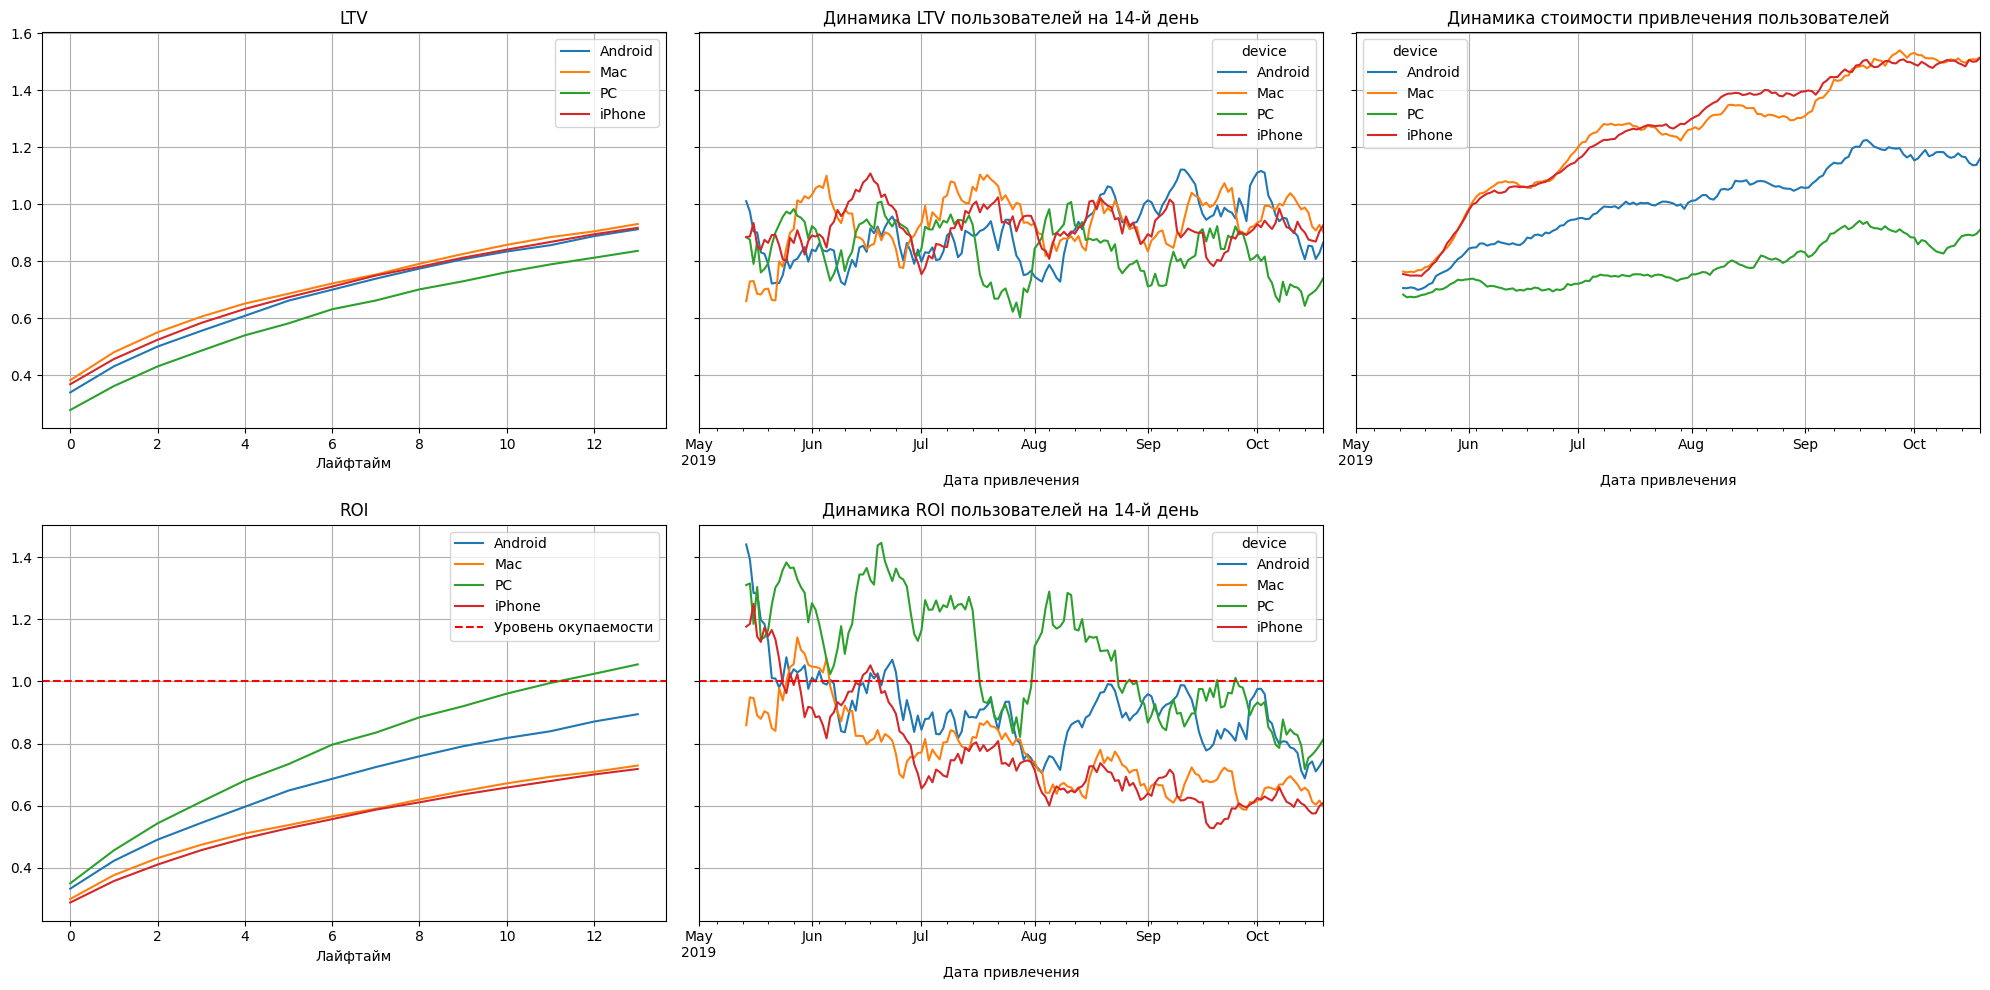

In [38]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, 14)

**Выводы**
1. LTV для пользователей Mac, iPhone и Android практически совпадают, для пользователей PC – несколько ниже.
2. Показатель LTV для пользователей всех типов устройств относительно стабилен.
2. Стоимость привлечения пользователей резко выросла в июне для всех типов устройств, однако для пользователей iPhone и Mac этот рост более значителен.
3. Реклама окупается только для пользователей PC.
4. С момента начала анализа ROI нервномерно, но неуклонно снижался для пользователей всех типов устройств.

### Анализ окупаемости рекламы с разбивкой по странам

Построим графики, отражающие LTV и ROI  зависимости от страны. Для этого последовательно вызовем функции `get_ltv` (для расчета) и `plot_ltv_roi` (для визуализации), параметру `dimensions` присвоим значение `'region'`.

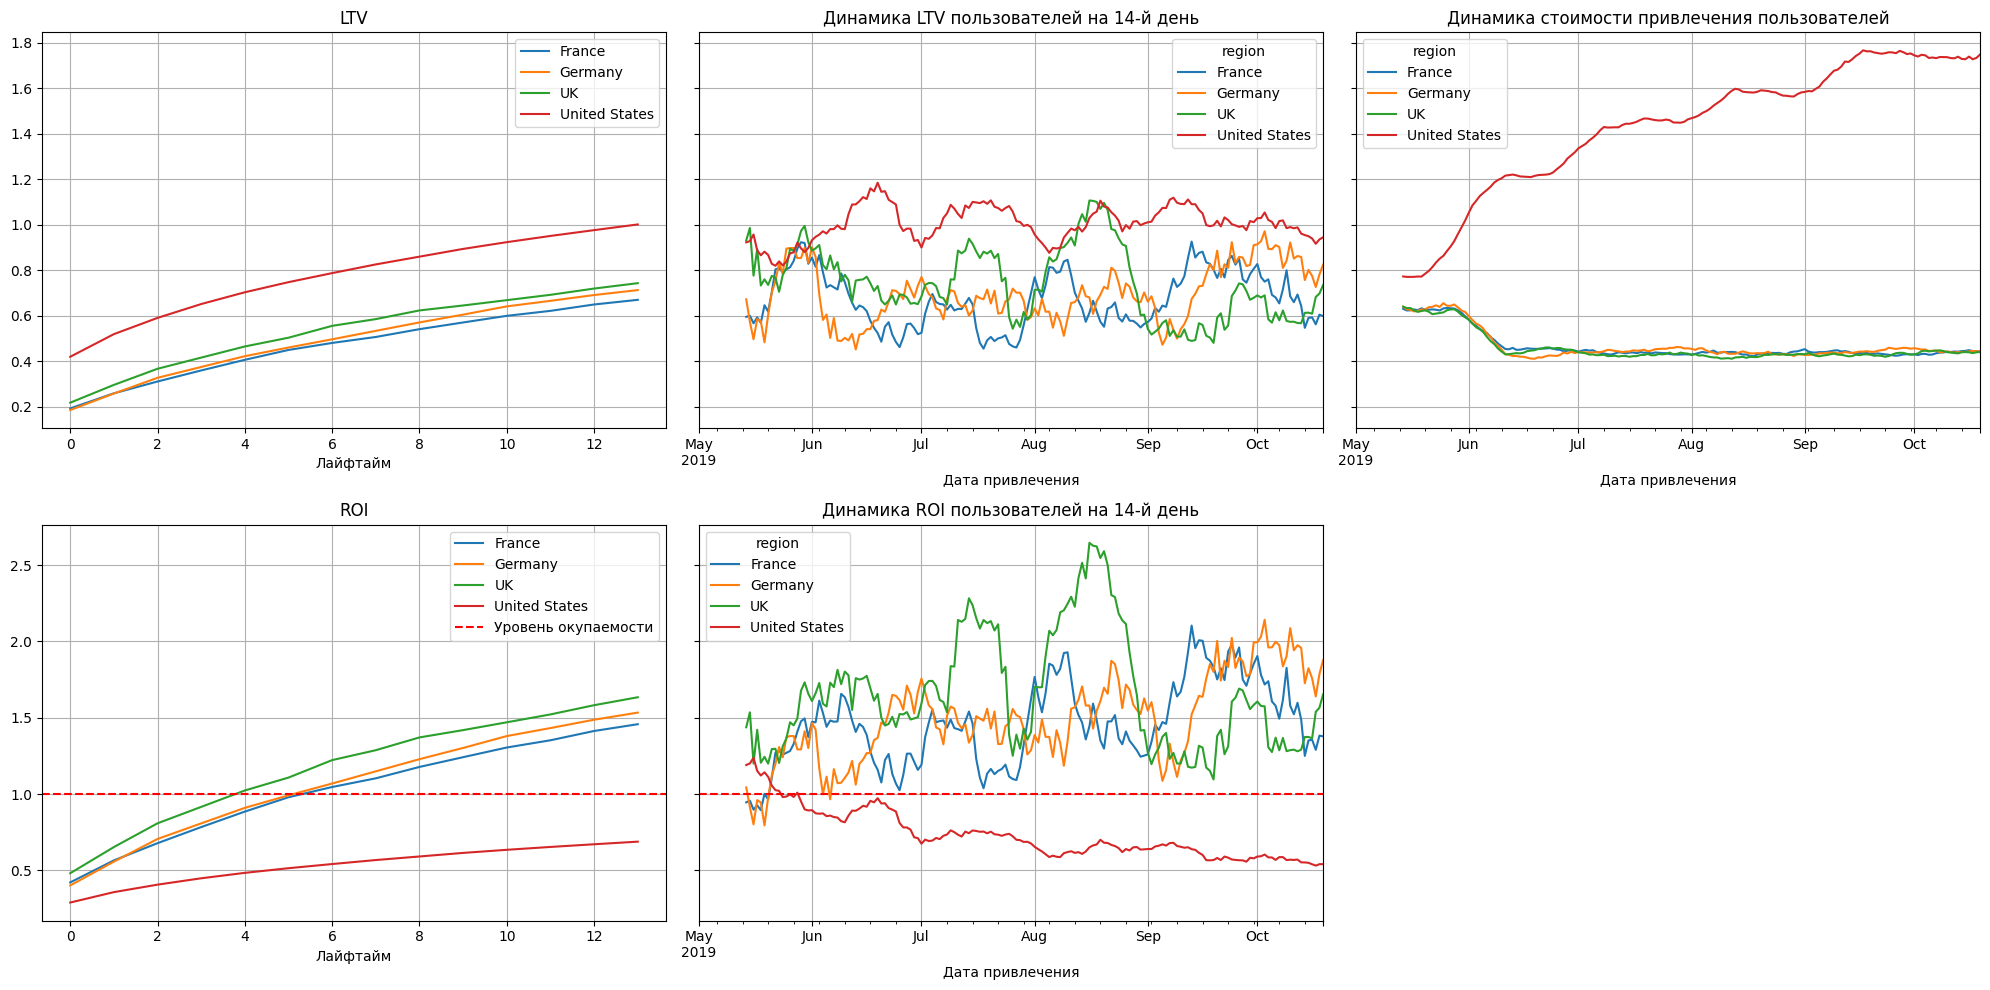

In [39]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, 14)

**Выводы**
1. LTV для пользователей из США выше, чем для пользователей из других стран. 
2. Показатель LTV для пользователей всех стран относительно стабилен.
2. В США в июне резко выросла стоимость привлечения пользователей; она продолжила расти вплоть до конца октября. В остальных странах стоимость привлечения пользователей упала в июне и далее практически не изменялась.
3. Реклама не окупается для пользователей из США и окупается для пользователей из других стран.
4. К концу мая ROI опустился ниже уровня окупаемости для пользователей из США; для пользователей из других стран ROI оставался выше уровня окупаемости на протяжении практически всего периода анализа.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

Построим графики, отражающие LTV и ROI  зависимости от канала привлечения пользователей. Для этого последовательно вызовем функции `get_ltv` (для расчета) и `plot_ltv_roi` (для визуализации), параметру `dimensions` присвоим значение `'channel'`.

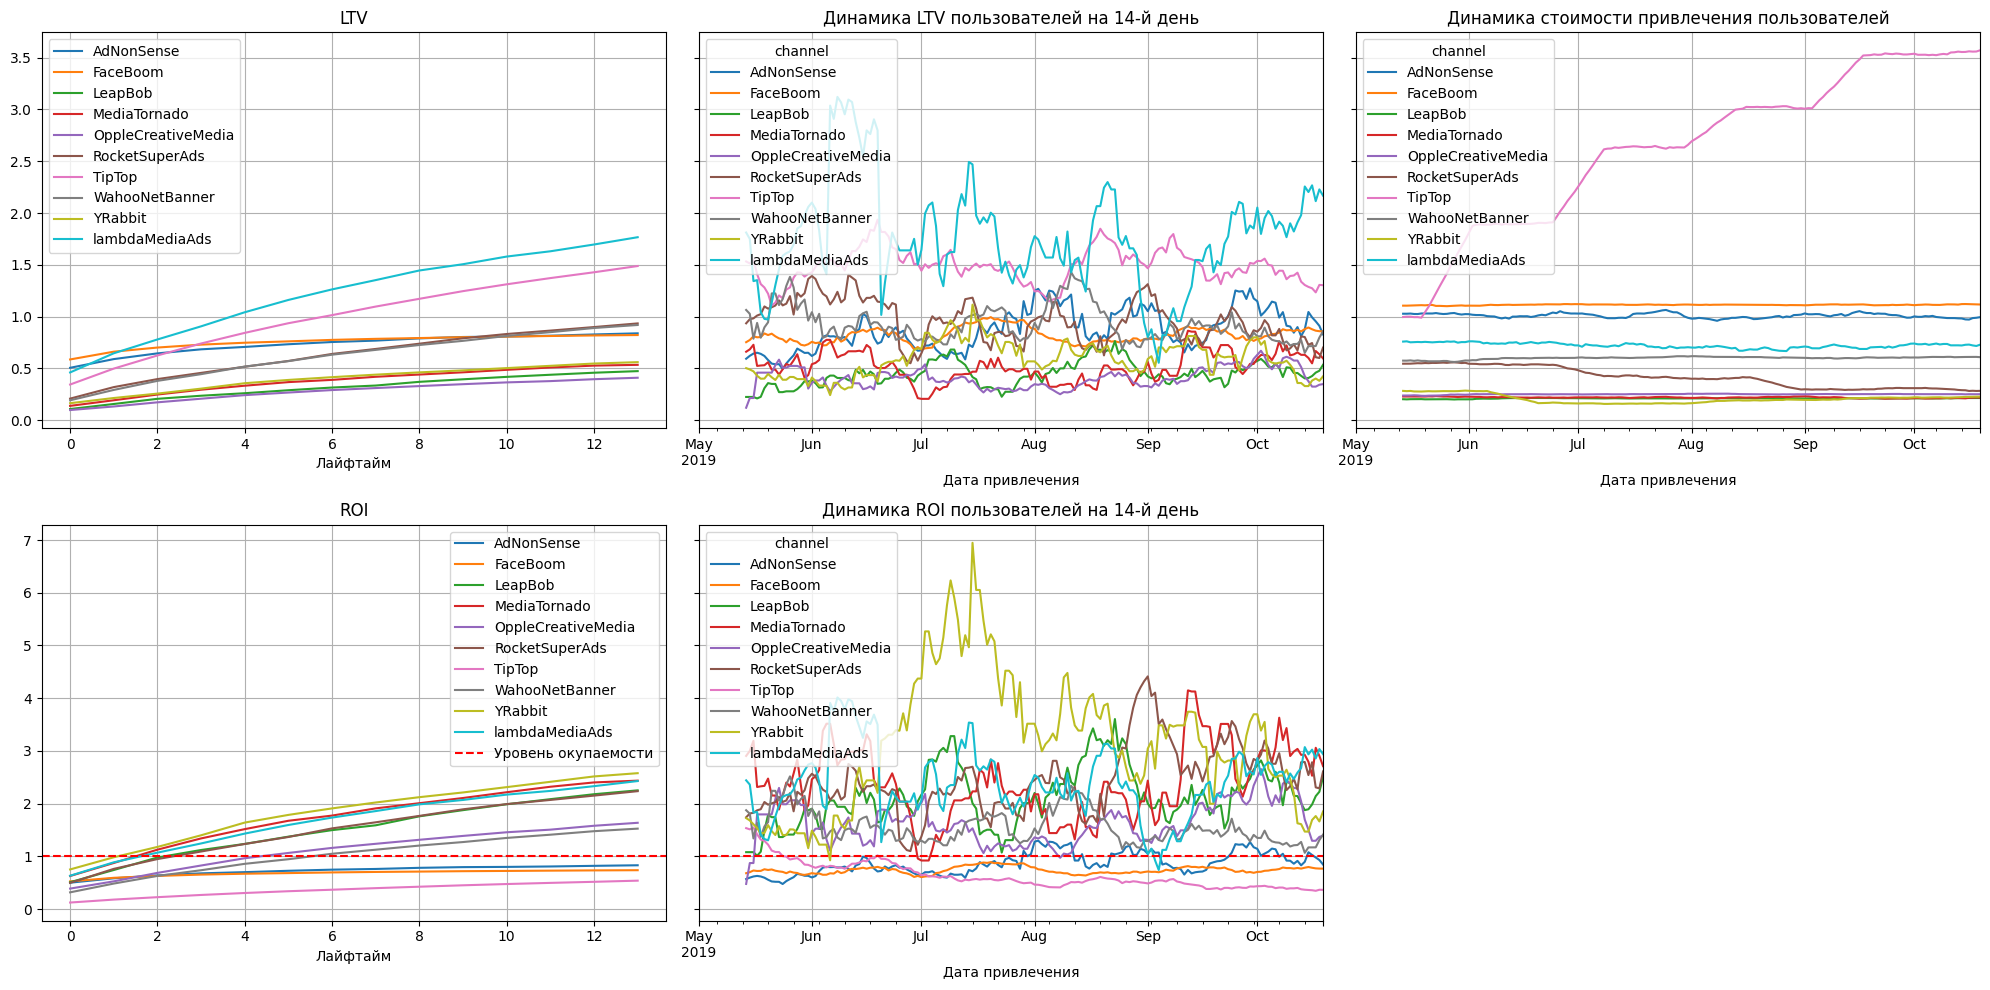

In [40]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, 14)

**Выводы по графикам**
1. LTV для каналов TipTop и lambdaMediaAds выше, чем для остальных каналов. Далее следуют RocketSuperAds и WahooNetBanner.
2. Несмотря на колебания показателя LTV с течением времени (эти колебания в большей степени характерны для lambdaMediaAds) в целом в масштабах всего периода анализа пожизненная ценность для всех каналов привлечения остается стабильной.
2. Начиная с мая стоимость привлечения пользователей по каналу TipTop начала резко расти. Рост продолжался весь период анализа. Для остальных источников стоимость привлечения оставалась стабильной.
3. Реклама не окупается для пользователей, привлеченных по каналам TipTop, Faceboom и AdNonSense. Наиболее высокий показатель ROI характерен для источников YRabbit, MediaTornado, lambdaMediaAds и RocketSuperAds и LeapBob.
4. Не считая майского падения ROI для канала TipTop ниже уровня окупаемости, других драматичных изменений ROI (связанных с пересечением уровня окупаемости) за период анализа не наблюдается. Отметим также резкий скачок ROI для YRabbit в июле. 

### Промежуточные выводы

Из графиков стало понятно следующее.

1. Реклама, направленная на привлечение пользователей, в целом не окупается. 
2. Факт неокупаемости ассоциирован:  
 - с использвованием утройств Mac, iPhone, Android;  
 - с локацией пользователей в США;  
 - с каналами TipTop, Faceboom и AdNonSense.  
3. С середины мая нарастает стоимость привлечения пользователей, в первую очередь:
 - пользователей iPhone и Мас; 
 - пользователей из США;
 - пользователей по каналу TipTop.  
 
С учетом относительно стабильности LTV, вероятно, проблемы окупаемости связаны именно с повышением стоимости привлечения пользователей. Причем схожий характер роста стоимости привлечения вне зависимости от способа разбивки данных может свидетельствовать о том, что у этих явлений одна первопричина. Посмотрим, какая связь может быть между географией, каналами привлечения и типами устройств.  

Прежде всего, определим функцию, возвращающую таблицу взаимосвязи между двумя признаками.

In [41]:
def relations(horizontal, vertical):
    # группируем данные по признаками horizontal и vertical, считаем число пользователей в каждой группе
    relations_table = profiles.pivot_table(index=horizontal, columns=vertical, values='user_id', aggfunc='count')
    # вычисляем долю пользователей с признаком horizontal от всего числа пользователей с признаком vertical
    for column in relations_table.columns:
        relations_table[column] = (relations_table[column] / relations_table[column].sum()).round(decimals=3)
    return relations_table

Для начала посмотрим, как связаны каналы привлечения с географией пользователей.

In [42]:
channel_to_region = relations('channel', 'region')
channel_to_region 

region              France  Germany     UK  United States
channel                                                  
AdNonSense           0.124    0.128  0.116            NaN
FaceBoom               NaN      NaN    NaN          0.471
LeapBob              0.270    0.264  0.273            NaN
MediaTornado           NaN      NaN    NaN          0.071
OppleCreativeMedia   0.270    0.269  0.274            NaN
RocketSuperAds         NaN      NaN    NaN          0.072
TipTop                 NaN      NaN    NaN          0.316
WahooNetBanner       0.269    0.271  0.269            NaN
YRabbit                NaN      NaN    NaN          0.070
lambdaMediaAds       0.067    0.068  0.068            NaN

Заметно, что все источники можно разделить на две группы: те, что работают только в США, и те, что работают во всех остальных странах, кроме США. К числу первых относится TipTop. При этом в США клиенты, привлеченные через TipTop, составляют значительную часть пользователей (около трети). Это значит, что увеличение затрат на привлечение пользователей через TipTop будет приводить к увеличению затрат на привлечение пользователей из США. В этом отношении можно полагать, что по крайней мере частично рост затрат на привлечение пользователей из США является вторичным.  

Теперь посмотрим, какие устройства предпочитают пользователи разных стран.

In [43]:
device_to_region = relations('device', 'region')
device_to_region 

region   France  Germany     UK  United States
device                                        
Android   0.300    0.299  0.291          0.201
Mac       0.105    0.107  0.097          0.249
PC        0.396    0.399  0.408          0.104
iPhone    0.199    0.195  0.204          0.446

Стоимость привлечения одного пользователя из США росла почти весь период анализа, в то время как пользователи из США состаляют подавляющее большинство клиентов компании. Поэтому стоимость привлечения пользоваетелей различных устройств росла приблизительно пропорционально распространенности этих устройств в США. Неудивительно, что в первую очередь повысилась стоимость привлечения владельцев iPhone и Mac. Здесь, опять же, по крайней мере частично повышение затрат на привлечение пользователей определенных устройств является вторичным.

Предположим, что основная проблема заключается в повышении уровня CAC для пользователей из TipTop. Допустим, что это повлекло за собой повышение CAC для пользователей из США (а это основная масса клиентов) и, как следствие, рост CAC для iPhone, Mac и Android. LTV для всех когорт оставался относительно стабильным – таким образом, неокупаемость пользователей из США, владельцев iPhone, Mac и Android, канала TipTop, вероятно, связанна именно с повышением стоимости привлечения одного пользователя из TipTop, а не с изменением качества клиентов.  

Необходимо разобраться, с чем связан рост CAC для пользователей, привлеченных из TipTop: с увеличением расходов на рекламу или же с уменьшением размеров когорт. Построим график, отражающий динамику размера когорт для пользователей TipTop за период анализа. 

In [44]:
# получаем данные о размерах когорт пользователей из TipTop в зависимости от даты привлечения
tiptop_cohort_size = roi_history.query('channel == "TipTop"')['cohort_size'].rolling(14).mean().reset_index()

# строим график
fig = px.line(tiptop_cohort_size, x="dt", y="cohort_size")
fig.update_layout(
    title=dict(
        text='Динамика размеров когорт пользователей, привлеченных через TipTop', 
        font_size=18
    ),
    xaxis=dict(
        title='Дата привлечения', 
        title_font_size=11, 
        range=('2019-05-07', '2019-10-27')
    ),
    yaxis=dict(
        title='Количество пользователей', 
        title_font_size=11
    ),
    width=950, height=500
)
fig.show()

Когорты пользователей из TipTop в размерах не уменьшались, а наоборот, увеличивались. Значит, дело в увеличении затрат на рекламу.

Таким образом, основной вывод звучит следующим образом: расходы на привлечение пользователей из TipTop все время увеличивались. LTV же для этой группы пользователей оставался стабильным, хоть и высоким, что привело к снижению окупаемости. Вероятно, пользователи, привлеченные из TipTop, имеют некий "потолок" платежеспособности – несмотря на активную рекламу они не готовы платить больше.

Увеличение расходов на рекламу в TipTop объсняет многое, но не объясняет неокупаемость пользователей, привлеченных из Faceboom и AdNonSense. Затраты на привлечение пользователей из Faceboom и AdNonSense были стабильными, их LTV также не претерпевал драматических изменений. Для того, чтобы разобраться с этим, посмотрим на конверсию и удержание пользователей.

### Анализ конверсии и удержания с разбивкой по устройствам

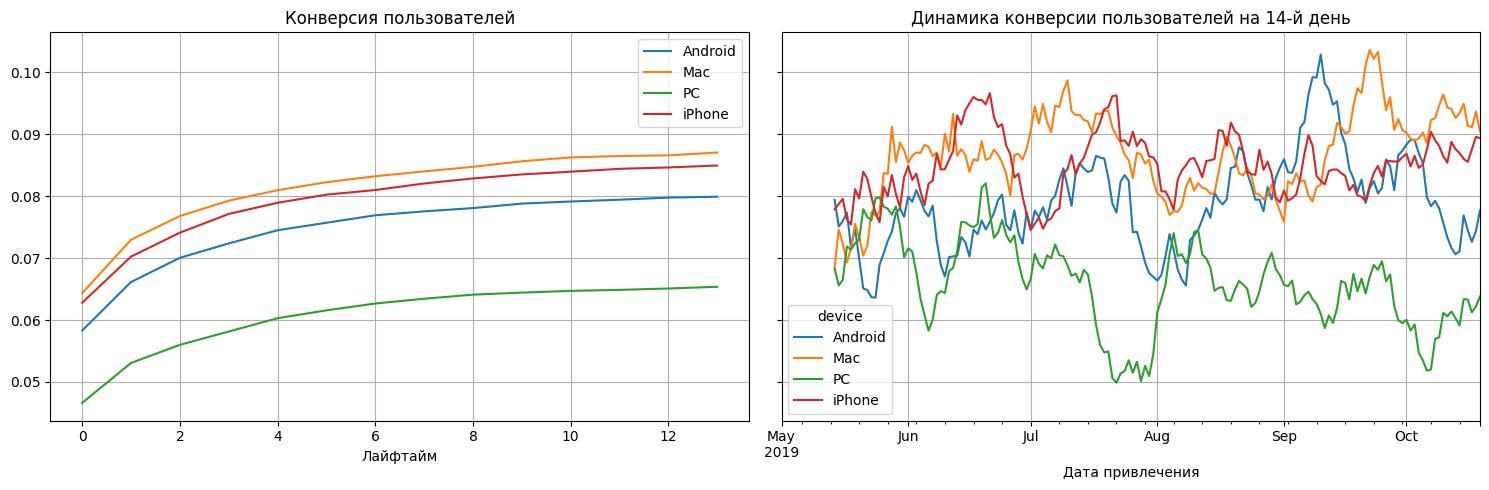

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

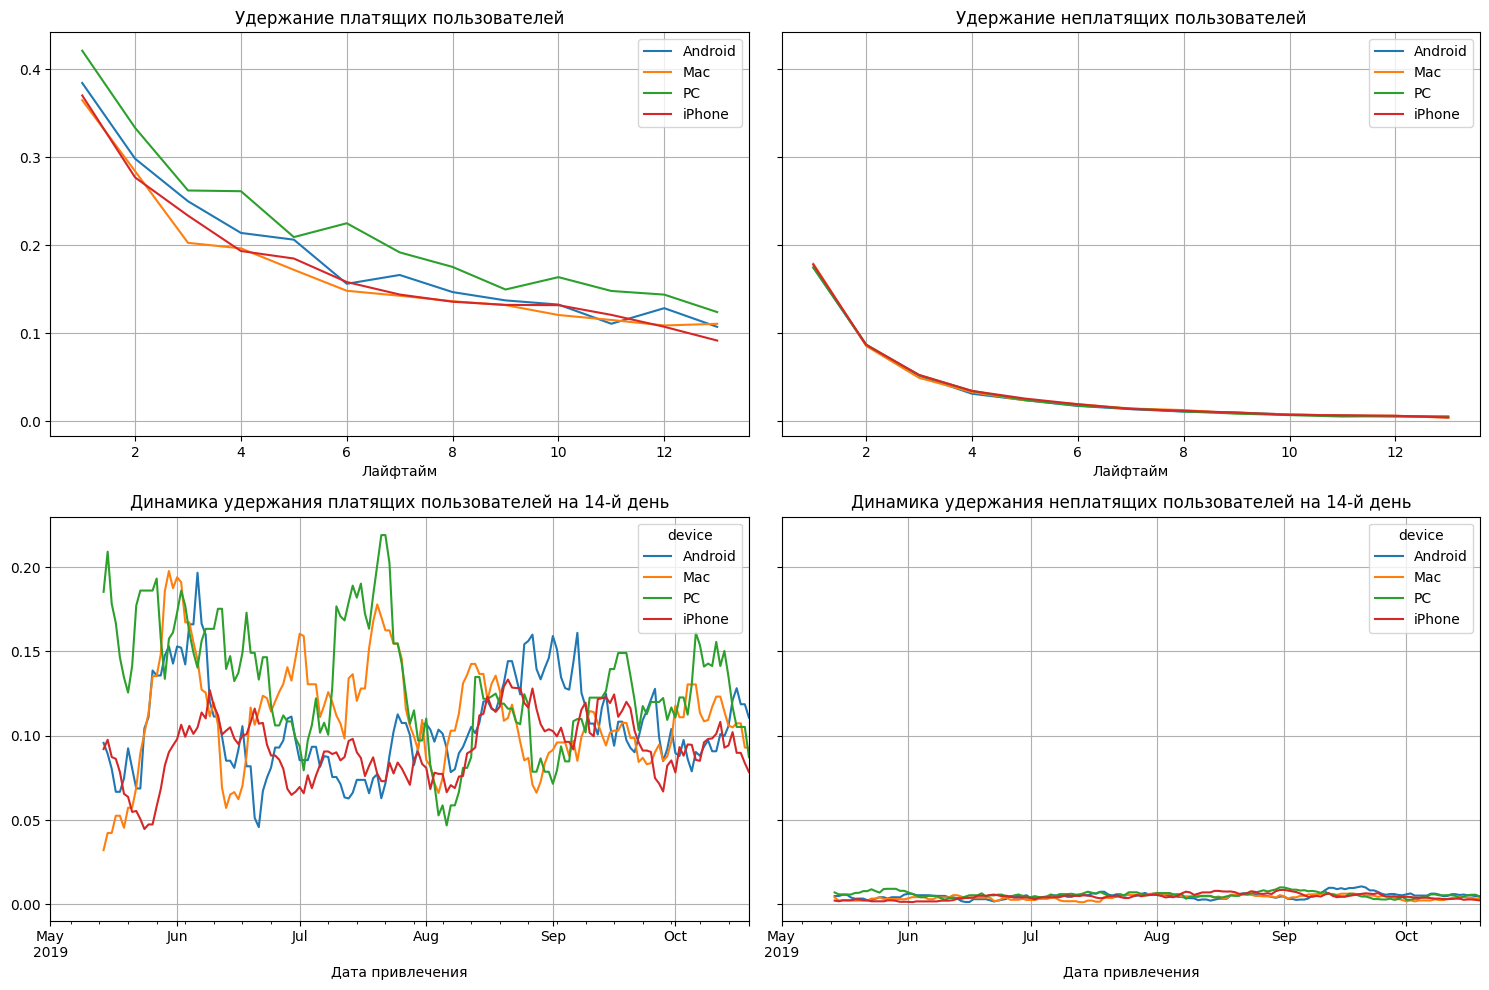

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

**Выводы по графикам**
1. Конверсия пользователей PC ниже, чем конверсия пользователей других устройств. 
2. Конверсия пользователей всех типов устройств росла в мае-июне, после чего оставалась достаточно стабильной.
3. Удержание пользователей всех типов устройств приблизительно одинаковое. Для платящих удержание выше, чем для неплатящих.
2. Удержание пользователей всех типов устройств оставалось относительно стабильным.

### Анализ конверсии и удержания с разбивкой по странам

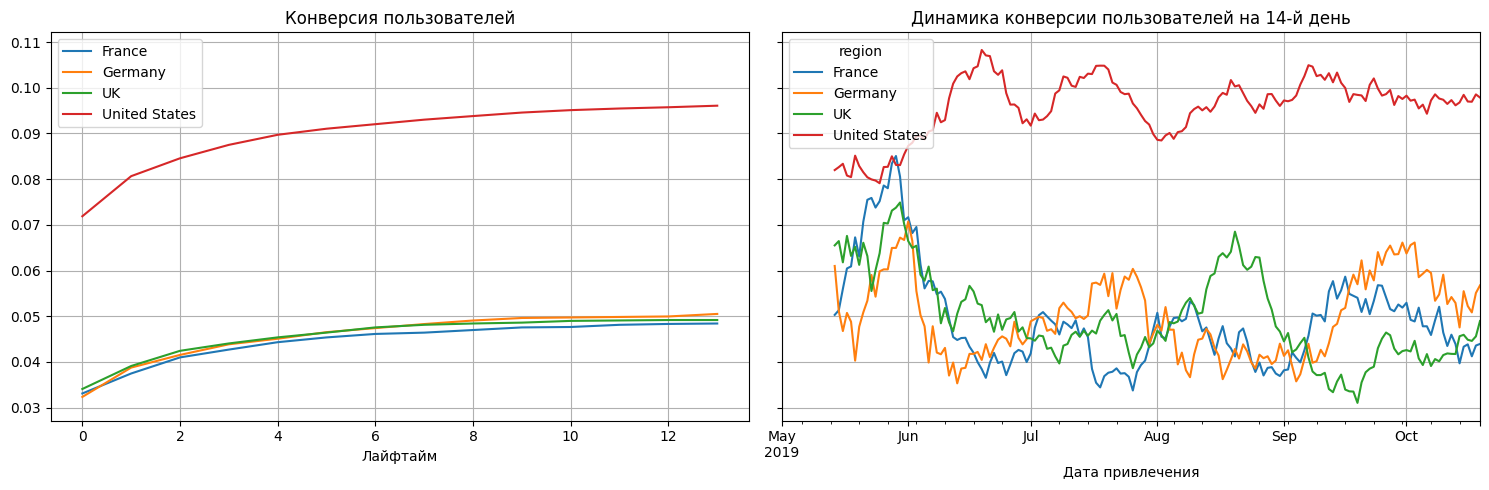

In [47]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

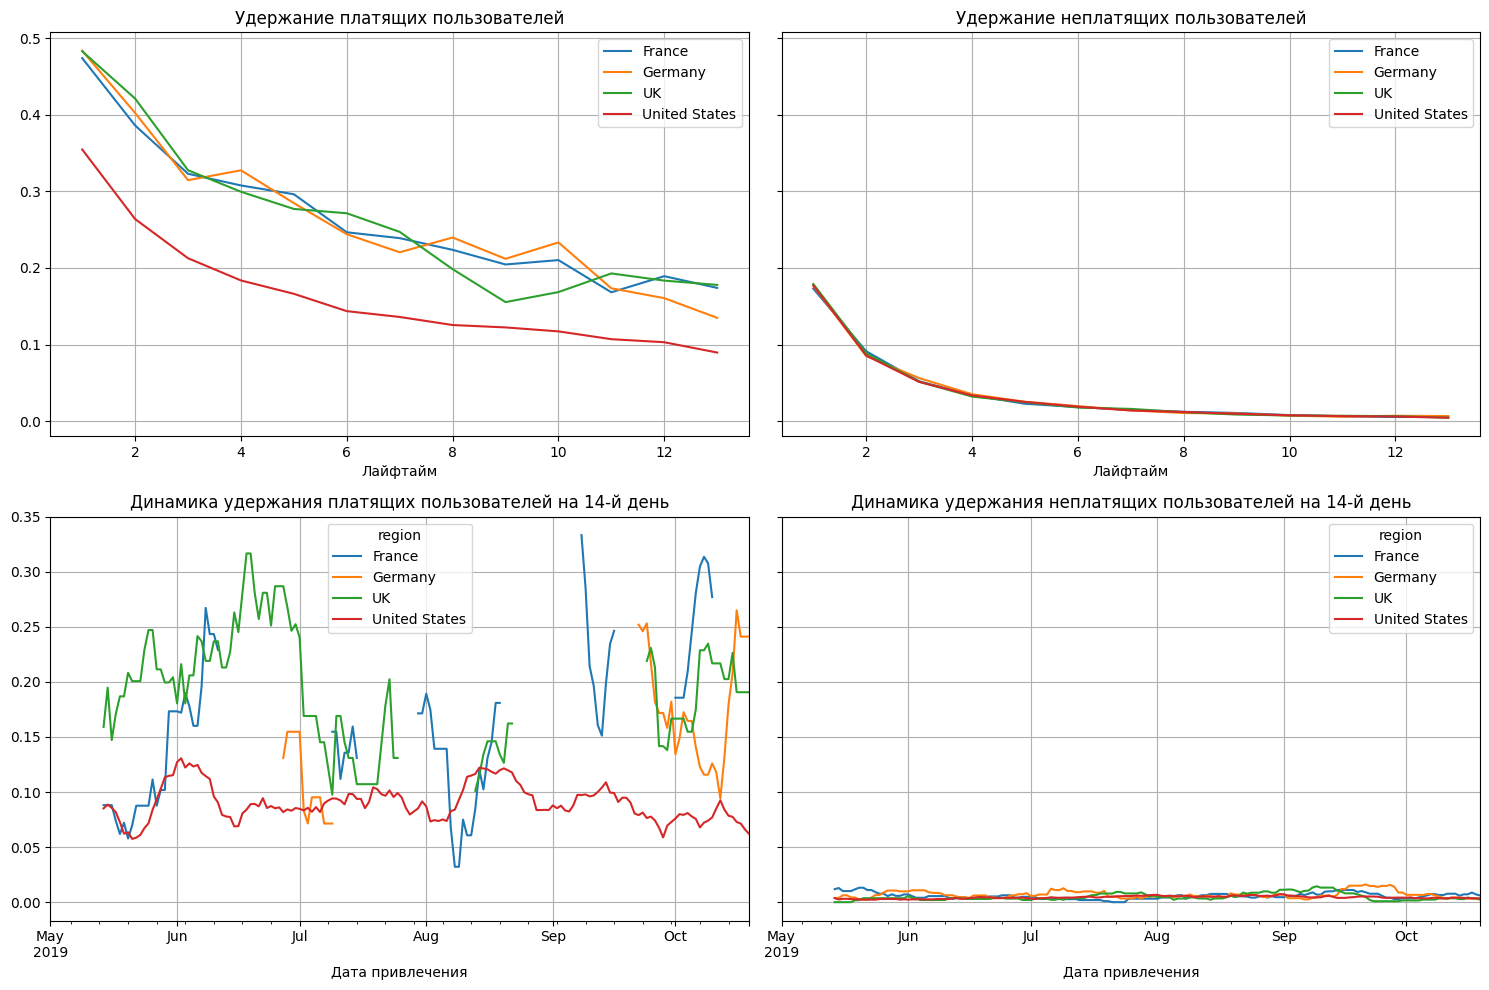

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

**Выводы по графикам**
1. Конверсия пользователей из США значительно выше, чем конверсия пользователей из других стран. 
2. Конверсия пользователей из США росла в мае-июне, после чего оставалась достаточно стабильной. Конверсия пользователей из других стран оставалась стабильной на протяжении периода анализа.
3. Удержание платящих пользователей из США ниже, чем удеражние пользователей из других стран. Для платящих удержание выше, чем для неплатящих.
2. Удержание пользователей во всех странах оставалось относительно стабильным (анализ графика динамики удержания платящих пользователей затруднен ввиду ограниченности данных в некоторых когортах).

### Анализ конверсии и удержания с разбивкой по рекламным каналам

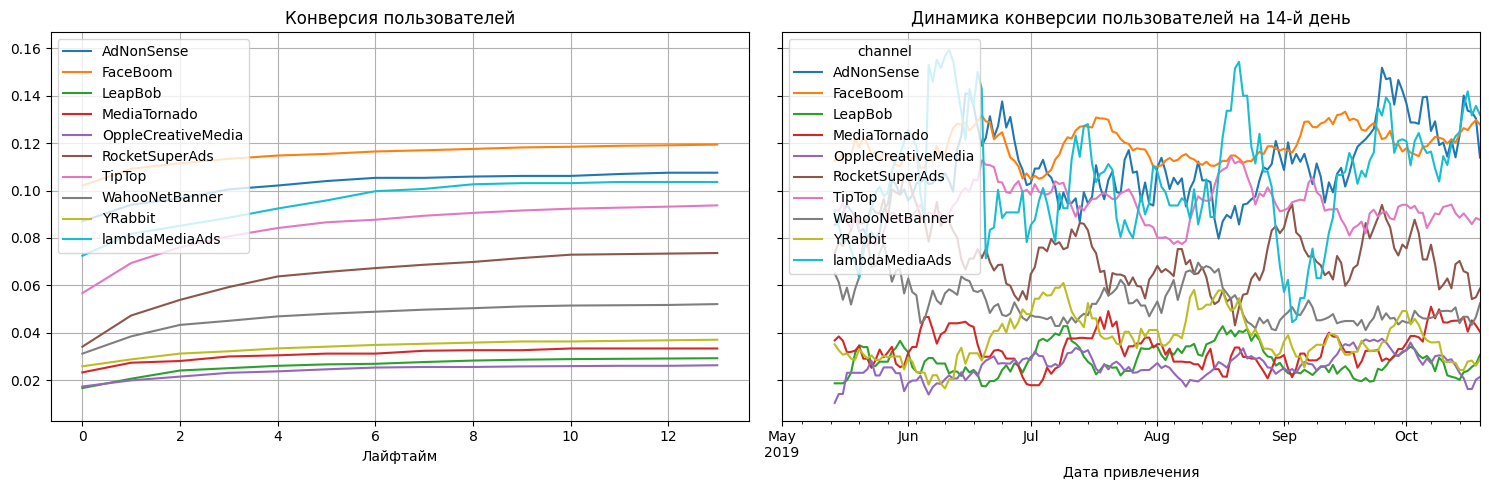

In [49]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

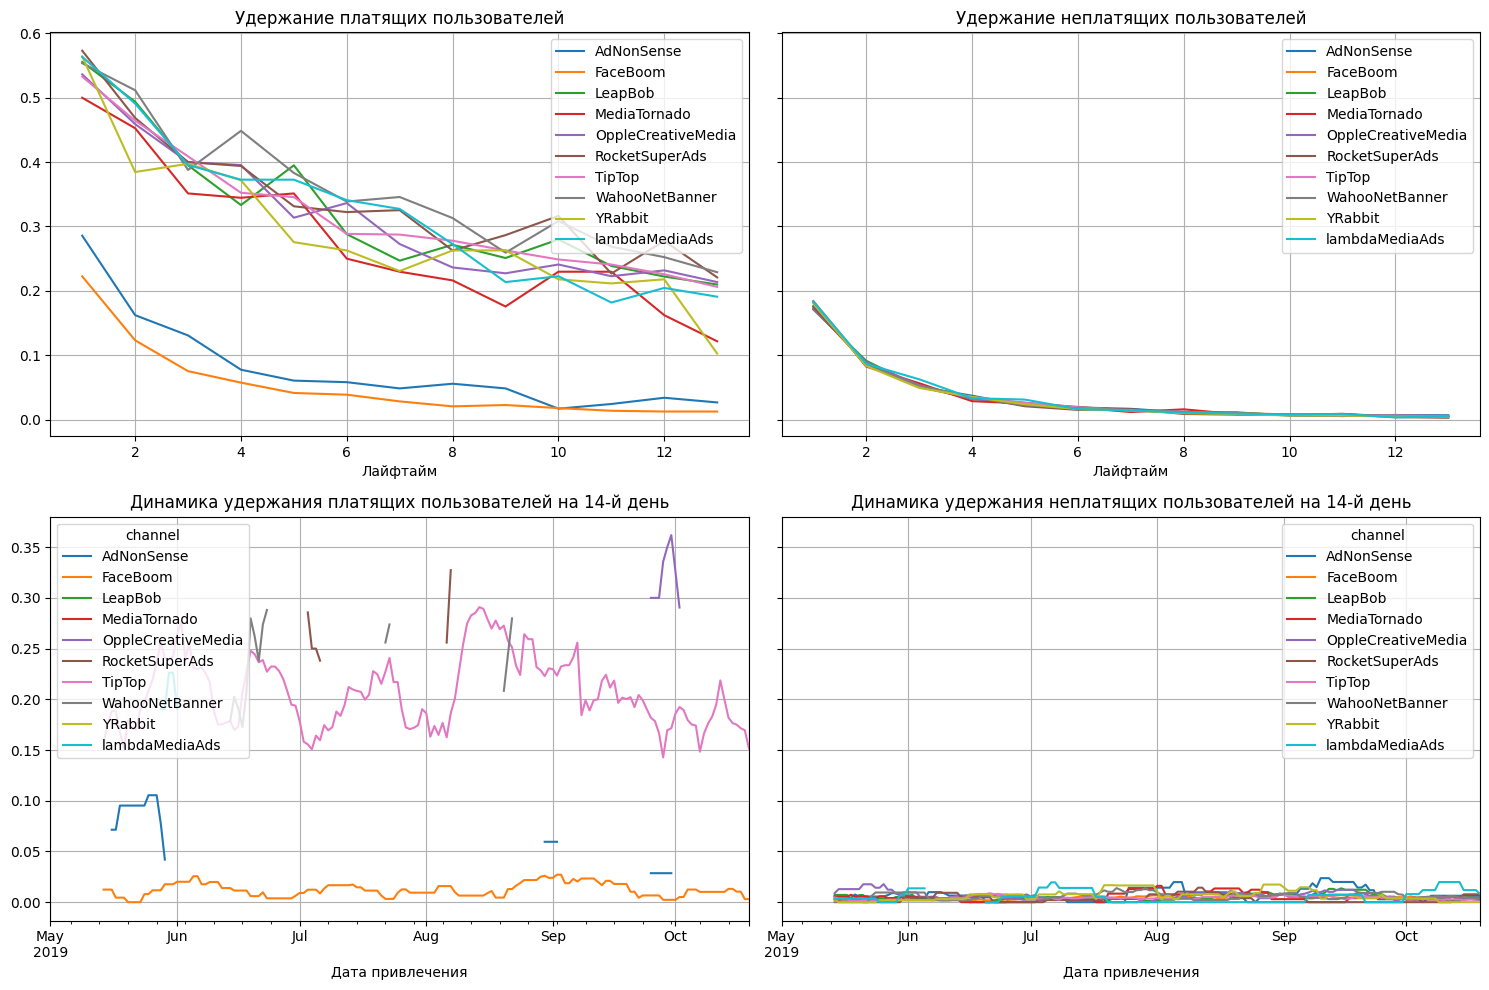

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

**Выводы по графикам**
1. Конверсия пользователей, привлеченных по разным каналам, неодинакова. Наиболее высокая она для пользователей, привлеченных из Faceboom и AdNonSense. Далее следуют lambdaMediaAds, TipTop и RocketSuperAds.
2. Конверсия пользователей, привлеченных по разным каналам, оставалась достаточно стабильной.
3. Удержание платящих пользователей, привлеченных из Faceboom и AdNonSense, очень низкое – на уровне удержания неплатящих пользователей. Удержание пользователей, привлеченных из других каналов, приблизительно одинаковое.
2. Удержание пользователей во всех странах оставалось относительно стабильным (анализ графика динамики удержания платящих пользователей затруднен ввиду ограниченности данных в некоторых когортах).

### Промежуточные выводы

Из графиков становится ясным следующее. 

1. Пользователи из США хорошо конвертируются (и конверсия выросла с увеличением затрат на привлечение пользователя), но плохо удерживаются.
2. Пользователи, привлеченные из Faceboom и AdNonSense хорошо конвертируются, но крайне плохо удерживаются. 

Из данных, полученных в п. 6.5 следует, что пользователи, привлеченные из FaceBoom составляют почти половину пользователей из США. В этой связи низкий коэффициент удержания пользователей из США может являться следствием низкого удержания пользователей, привлеченных из Faceboom.

По какой-то причине пользователи, привлеченные из FaceBoom и AdNonSense, несмотря на высокий уровень конверсии, перестают заходить в приложение. При этом, как видно из графика в п. 6.4. ("Динамика стоимости привлечения пользователей"), расходы на привлечение пользователей из FaceBoom и AdNonSense стабильно высокие. 

Для того, чтобы понять, почему пользователи, привлеченные из FaceBoom и AdNonSense ведут себя именно таким образом, необходимо проведение отдельного исследования. Возможно, это как-то связано с особенностями клиентов, пользующихся FaceBoom и посещающих сайты с рекламой от AdNonSense. Например, может оказаться, что средний возраст пользователей, привлеченных из FaceBoom и AdNonSense, выше. У людей старшего поколения можно ожидать более высокую платежеспособность (они легко готовы совершить покупку), но если эти клиенты не являются целевой аудиторией приложения, то они быстро теряют интерес. Таким образом, для получения полного представление о причинах такого поведения необходимо ответить на вопросы:
 - в чем особенность пользователей, привлеченных из FaceBoom и AdNonSense?
 - какова целевая аудитория приложения?
 - являются ли пользователи из FaceBoom и AdNonSense целевой аудиторией приложения?

## Общий вывод

Было проведено исследование, включавшее данные о 150008 уникальных пользователях приложения, привлеченных в период с 1 мая 2019 года по 27 октября 2019 года. Привлеченные пользователи находились в США, Германии, Великобритании и Франции. Основная масса пользователей приложения проживает в США. Также наибольшая доля платящих пользователей приходится на США. Для работы с приложением клиенты использовали устройства Mac, iPhone, Android и PC. Пользователи Mac и iPhone платили в приложении несколько чаще, чем пользователи Android и PC. Среди клиентов, привлеченных из FaceBoom, AdNonSense и lambdaMediaAds, доля платящих наибольшая (около 10–12%).

Общая сумма затрат на маркетинг составила 105 497.3 у.е. Наиболее затратные источники привлечения пользователей — TipTop и FaceBoom. Расходы на привлечение пользователей из источников TipTop и FaceBoom демонстрировали тенденцию к постепенному росту в исследованном периоде. Средняя стоимость привлечения одного пользователя для всего проекта (без учета органических пользователей) составила 1.1 у.е. Наибольшая средняя стоимость привлечения одного пользователя наблюдается для канала TipTop и составляет составила 2.8 у.е.

Причины неэффективности привлечения пользователей можно сформулировать следующим образом.
1. Высокие затраты на рекламу в TipTop. Повышение затрат на рекламу не компенсируется повышением LTV.
2. Низкое удержание пользователей, привлеченных по каналам Faceboom и AdNonSense, на фоне относительно высоких затратах на привлечение пользователей.

Отдельно необходимо отметить два канала: lambdaMediaAds и RocketSuperAds – эти каналы одновременно обладают и относительно высоким значением LTV, и относительно высоким значением конверсии. При текущих расходах на рекламу эти два источника окупаются.

Рекомендации для отдела маркетинга.
1. Снизить затраты на рекламу в TipTop.
2. Попытаться повысить удержание пользователей, привлеченных из FaceBoom и AdNonSense – например, с помощью пуш-уведомлений. Альтернативно можно также снизить затраты на рекламу в этих источниках.
3. В будущем было бы полезно провести исследование для выяснения причин низкого удержания пользователей, привлеченных по каналам FaceBoom и AdNonSense.
4. Обратить внимание на рекламные каналы lambdaMediaAds (в Европе) и RocketSuperAds (в США), поскольку они представляются наиболее перспективными.